In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import json
import seaborn as sns

In [62]:
constraints = '../data/1/constraints.json'
heats_prev = '../data/1/previous_heats_with_properties.json'
schedule = '../data/1/production_schedule.json'
scrap_inventory = '../data/1/scrap_inventory.json'
scrap_orders = '../data/1/scrap_orders.json'

In [63]:
with open(constraints) as json_file:
    constraints = json.load(json_file)
with open(heats_prev) as json_file:
    heats_prev = json.load(json_file)
with open(schedule) as json_file:
    schedule = json.load(json_file)
with open(scrap_inventory) as json_file:
    scrap_inventory = json.load(json_file)
with open(scrap_orders) as json_file:
    scrap_orders = json.load(json_file)

In [64]:
heats_prev = pd.DataFrame(heats_prev)

In [65]:
commodities = ['bushling', 'pig_iron', 'municipal_shred', 'skulls']

In [66]:
for i, row in heats_prev.iterrows():
    for c in commodities:
        heats_prev.loc[i, c] = heats_prev.loc[i, 'actual_recipe'][c]
        heats_prev.loc[i, c] = heats_prev.loc[i, 'actual_recipe'][c]
        heats_prev.loc[i, c] = heats_prev.loc[i, 'actual_recipe'][c]
        heats_prev.loc[i, c] = heats_prev.loc[i, 'actual_recipe'][c]
    heats_prev.loc[i, 'cu_pct'] = heats_prev.loc[i, 'chemistry']['cu_pct']

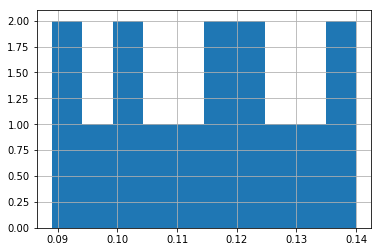

In [68]:
#observation - there is no variance in the actuals per grade...that doesn't make sense. 
heats_prev['cu_pct'].hist()

In [72]:
heats_prev['total_input'] = heats_prev[commodities].sum(axis=1)

In [76]:
heats_prev['yield'] = heats_prev['tap_weight']/heats_prev['total_input']

In [80]:
for c in commodities:
    heats_prev[c+'_norm'] = heats_prev[c]/heats_prev['total_input']

In [81]:
x = heats_prev[[c+'_norm' for c in commodities]]
y = heats_prev['yield']

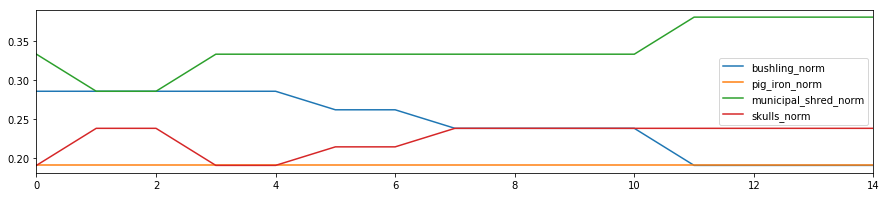

In [84]:
x.plot(figsize=(15,3))

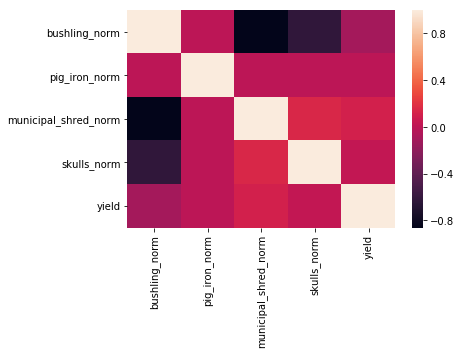

In [88]:
sns.heatmap(heats_prev[[c+'_norm' for c in commodities] + ['yield']].corr())

In [90]:
from sklearn.linear_model import LinearRegression

In [91]:
lr = LinearRegression()
lr = lr.fit(x, y)


In [99]:
y - lr.predict(x)

0     0.025860
1    -0.019317
2    -0.000270
3    -0.007473
4     0.002051
5    -0.031527
6    -0.012479
7     0.020366
8    -0.003444
9     0.029890
10    0.010842
11   -0.001611
12    0.007912
13   -0.006373
14   -0.020659
Name: yield, dtype: float64

In [107]:
pd.DataFrame(schedule)

,chemistry,heat_id,heat_seq,required_weight,steel_grade
0,{'cu_pct': 0.1},heat-1001,101,1000,ST1
1,{'cu_pct': 0.1},heat-1002,101,1000,ST1
2,{'cu_pct': 0.1},heat-1003,101,1000,ST1
3,{'cu_pct': 0.1},heat-1004,101,1000,ST1
4,{'cu_pct': 0.1},heat-1005,101,1000,ST1
5,{'cu_pct': 0.12},heat-1006,102,1200,ST2
6,{'cu_pct': 0.12},heat-1007,102,1200,ST2
7,{'cu_pct': 0.12},heat-1008,102,1200,ST2
8,{'cu_pct': 0.12},heat-1009,102,1200,ST2
9,{'cu_pct': 0.12},heat-1010,102,1200,ST2


In [105]:
{bushling: 50%, skulls: 25%, pig_iron: 15%, shred: 10%}

Yield = 95% 
req_weight = 1000
total_weight = 1000/0.95

total_weight * %busheling, etc
Round to the right weight for optimization

recipe

,actual_recipe,chemistry,heat_id,heat_seq,required_weight,steel_grade,tap_weight,bushling,pig_iron,municipal_shred,skulls,cu_pct,total_input,yield,bushling_norm,pig_iron_norm,municipal_shred_norm,skulls_norm
0,"{'bushling': 300, 'pig_iron': 200, 'municipal_...",{'cu_pct': 0.095},heat-501,51,1000,ST1,970,300.0,200.0,350.0,200.0,0.095,1050.0,0.923810,0.285714,0.190476,0.333333,0.190476
1,"{'bushling': 300, 'pig_iron': 200, 'municipal_...",{'cu_pct': 0.104},heat-502,51,1000,ST1,920,300.0,200.0,300.0,250.0,0.104,1050.0,0.876190,0.285714,0.190476,0.285714,0.238095
2,"{'bushling': 300, 'pig_iron': 200, 'municipal_...",{'cu_pct': 0.105},heat-503,51,1000,ST1,940,300.0,200.0,300.0,250.0,0.105,1050.0,0.895238,0.285714,0.190476,0.285714,0.238095
3,"{'bushling': 300, 'pig_iron': 200, 'municipal_...",{'cu_pct': 0.089},heat-504,51,1000,ST1,935,300.0,200.0,350.0,200.0,0.089,1050.0,0.890476,0.285714,0.190476,0.333333,0.190476
4,"{'bushling': 300, 'pig_iron': 200, 'municipal_...",{'cu_pct': 0.093},heat-505,51,1000,ST1,945,300.0,200.0,350.0,200.0,0.093,1050.0,0.900000,0.285714,0.190476,0.333333,0.190476
5,"{'bushling': 275, 'pig_iron': 200, 'municipal_...",{'cu_pct': 0.102},heat-506,52,1200,ST2,910,275.0,200.0,350.0,225.0,0.102,1050.0,0.866667,0.261905,0.190476,0.333333,0.214286
6,"{'bushling': 275, 'pig_iron': 200, 'municipal_...",{'cu_pct': 0.114},heat-507,52,1200,ST2,930,275.0,200.0,350.0,225.0,0.114,1050.0,0.885714,0.261905,0.190476,0.333333,0.214286
7,"{'bushling': 250, 'pig_iron': 200, 'municipal_...",{'cu_pct': 0.118},heat-508,52,1200,ST2,965,250.0,200.0,350.0,250.0,0.118,1050.0,0.919048,0.238095,0.190476,0.333333,0.238095
8,"{'bushling': 250, 'pig_iron': 200, 'municipal_...",{'cu_pct': 0.124},heat-509,52,1200,ST2,940,250.0,200.0,350.0,250.0,0.124,1050.0,0.895238,0.238095,0.190476,0.333333,0.238095
9,"{'bushling': 250, 'pig_iron': 200, 'municipal_...",{'cu_pct': 0.121},heat-510,52,1200,ST2,975,250.0,200.0,350.0,250.0,0.121,1050.0,0.928571,0.238095,0.190476,0.333333,0.238095


In [102]:
constraints

{'scrap_type_constraints_per_heat': [{'scrap_type': 'bushlings',
   'type': 'minimum',
   'weight': 200},
  {'scrap_type': 'pig_iron', 'type': 'minimum', 'weight': 100},
  {'scrap_type': 'pig_iron', 'type': 'maximum', 'weight': 300}]}